In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import masks
import gif
import raw
import lineage

In [2]:
#f_meta = h5py.File('../6814_2/6814_2_metadata.hdf5')
#f_meta.keys()

In [3]:
#pic = f_meta['full_data'][0]
#plt.imshow(pic)

In [4]:
#pic_s = pic[2340:2870, 2320:2850]
#plt.imshow(pic_s)

In [5]:
#f_meta['fov_wells'][-1]

In [6]:
# Input file
fN = h5py.File("../6814_2/6814_2_featuresN.hdf5", "r")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
traj = pd.read_hdf("../6814_2/6814_2_featuresN.hdf5", '/trajectories_data')
timeseries = fN['timeseries_data']

In [7]:
# Get wells - data from timeseries_data, at position [2]

wells = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    if well in well_dict.keys():
        well_dict[well].append(i)

In [8]:
# get well by well, and store
d4 = [180, 710, 160, 690]
d3 = [180, 710, 880, 1410]
d2 = [180, 710, 1600, 2130]
d1 = [180, 710, 2320, 2850]

c4 = [895, 1425, 160, 690]
c3 = [895, 1425, 880, 1410]
c2 = [895, 1425, 1600, 2130]
c1 = [895, 1425, 2320, 2850]

b4 = [1620, 2150, 160, 690]
b3 = [1620, 2150, 880, 1410]
b2 = [1620, 2150, 1600, 2130]
b1 = [1620, 2150, 2320, 2850]

a4 = [2340, 2870, 160, 690]
a3 = [2340, 2870, 880, 1410]
a2 = [2340, 2870, 1600, 2130]
a1 = [2340, 2870, 2320, 2850]

In [9]:
well_names = list(well_dict.keys())
well_names

['A1',
 'A2',
 'A3',
 'A4',
 'B1',
 'B2',
 'B3',
 'B4',
 'C1',
 'C2',
 'C3',
 'C4',
 'D1',
 'D2',
 'D3',
 'D4']

In [10]:
## Finish making masks~

# Skip C2

#for well in well_names:
#    if well == 'C2':
#        pass
#    else:
#        masks.make_well_masks(well=well, traj=traj, dorsal=dorsal, ventral=ventral, well_dict=well_dict, down_sampling=6, file_dir="../6814_2/", sequential=False)

# Make raw wells 
well by well

In [11]:
wells = [a1, a2, a3, a4, b1, b2, b3, b4, c1, c2, c3, c4, d1, d2, d3, d4]

In [13]:
for i, well_name in enumerate(well_names):
    output = "../6814_2/raw_wells/%s_raw.npy" % well_name
    raw.get_raw_well(wells[i], well_name=well_name, video_path="../6814_2/6814_2.mp4", filename=output, frame_start=0, frame_end=9001, down_sampling=1) 

-------- A1 --------
-------- A2 --------
-------- A3 --------
-------- A4 --------
-------- B1 --------
-------- B2 --------
-------- B3 --------
-------- B4 --------
-------- C1 --------
-------- C2 --------
-------- C3 --------
-------- C4 --------
-------- D1 --------
-------- D2 --------
-------- D4 --------


In [16]:
for well_name in well_names:
    if well_name == 'C2':
        pass
    else:
        print(well_name)
        raw_video_path = '../6814_2/raw_wells/%s_raw.npy' % well_name
        txt = '../6814_2/%s_not_empty.txt' % well_name
        raw.make_raw_videos(raw_video_path=raw_video_path, mask_frame_info_fn=txt, well_name=well_name, output_dir='../6814_2')

A1
(100, 530, 530, 1)
(100, 530, 530, 1)
A2
(100, 530, 530, 1)
A3
(100, 530, 530, 1)
(100, 530, 530, 1)
A4
(100, 530, 530, 1)
B1
(100, 530, 530, 1)
B2
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
B3
(100, 530, 530, 1)
B4
(100, 530, 530, 1)
(100, 530, 530, 1)
C1
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
C3
(100, 530, 530, 1)
(100, 530, 530, 1)
C4
(100, 530, 530, 1)
(100, 530, 530, 1)
D1
(100, 530, 530, 1)
(100, 530, 530, 1)
D2
(100, 530, 530, 1)
(100, 530, 530, 1)
D3
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
D4
(100, 530, 530, 1)
(100, 530, 530, 1)


Processing raw video.
unique_worm_ids:  [35, 36]
sequential ids:  [1, 2]
Processing raw video.
unique_worm_ids:  []
sequential ids:  []


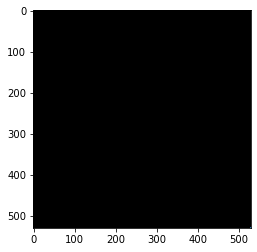

In [18]:
gif.plot_gif(np.load('../6814_2/C3_raw_1.npy'), '../6814_2/gif/C3_raw_1.gif', raw=True)
gif.plot_gif(np.load('../6814_2/C3_mask_1.npy'), '../6814_2/gif/C3_mask_1.gif')

gif.plot_gif(np.load('../6814_2/B1_raw_1.npy'), '../6814_2/gif/B1_raw_1.gif', raw=True)
gif.plot_gif(np.load('../6814_2/B1_mask_1.npy'), '../6814_2/gif/B1_mask_1.gif')

Processing raw video.
unique_worm_ids:  [7]
sequential ids:  [1]


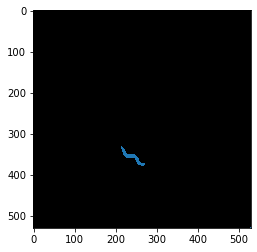

In [19]:
gif.plot_gif(np.load('../6814_2/A2_raw_1.npy'), '../6814_2/gif/A2_raw_1.gif', raw=True)
gif.plot_gif(np.load('../6814_2/A2_mask_1.npy'), '../6814_2/gif/A2_mask_1.gif')

# Lineages

In [20]:
# lineages

from lineage import make_lineage

a1_1 = make_lineage(traj, well_dict, 'A1', '6814_2', "../6814_2/A1_mask_1.npy", 1) 
a2_1 = make_lineage(traj, well_dict, 'A2', '6814_2', "../6814_2/A2_mask_1.npy", 1) 
a3_1 = make_lineage(traj, well_dict, 'A3', '6814_2', "../6814_2/A3_mask_1.npy", 1) 
a3_2 = make_lineage(traj, well_dict, 'A3', '6814_2', "../6814_2/A3_mask_2.npy", 2) 
a4_1 = make_lineage(traj, well_dict, 'A4', '6814_2', "../6814_2/A4_mask_1.npy", 1) 

b1_1 = make_lineage(traj, well_dict, 'B1', '6814_2', "../6814_2/B1_mask_1.npy", 1)

b2_1 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_1.npy", 1)
b2_2 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_2.npy", 2)
b2_3 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_3.npy", 3)
b2_4 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_4.npy", 4)
b2_5 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_5.npy", 5)
b2_6 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_6.npy", 6)
b2_7 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_7.npy", 7)
b2_8 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_8.npy", 8)
b2_9 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_9.npy", 9)
b2_10 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_10.npy", 10)
b2_11 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_11.npy", 11)
b2_12 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_12.npy", 12)
b2_13 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_13.npy", 13)
b2_14 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_14.npy", 14)
b2_15 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_15.npy", 15)
b2_16 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_16.npy", 16)
b2_17 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_17.npy", 17)
b2_18 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_18.npy", 18)
b2_19 = make_lineage(traj, well_dict, 'B2', '6814_2', "../6814_2/B2_mask_19.npy", 19)

b3_1 = make_lineage(traj, well_dict, 'B3', '6814_2', "../6814_2/B3_mask_1.npy", 1)

b4_1 = make_lineage(traj, well_dict, 'B4', '6814_2', "../6814_2/B4_mask_1.npy", 1)
b4_2 = make_lineage(traj, well_dict, 'B4', '6814_2', "../6814_2/B4_mask_2.npy", 2)

c1_1 = make_lineage(traj, well_dict, 'C1', '6814_2', "../6814_2/C1_mask_1.npy", 1)
c1_2 = make_lineage(traj, well_dict, 'C1', '6814_2', "../6814_2/C1_mask_2.npy", 2)
c1_3 = make_lineage(traj, well_dict, 'C1', '6814_2', "../6814_2/C1_mask_3.npy", 3)
c1_4 = make_lineage(traj, well_dict, 'C1', '6814_2', "../6814_2/C1_mask_4.npy", 4)

# skip c2

c3_1 = make_lineage(traj, well_dict, 'C3', '6814_2', "../6814_2/C3_mask_1.npy", 1)
c3_2 = make_lineage(traj, well_dict, 'C3', '6814_2', "../6814_2/C3_mask_2.npy", 2)

c4_1 = make_lineage(traj, well_dict, 'C4', '6814_2', "../6814_2/C4_mask_1.npy", 1)
c4_2 = make_lineage(traj, well_dict, 'C4', '6814_2', "../6814_2/C4_mask_2.npy", 2)

d1_1 = make_lineage(traj, well_dict, 'D1', '6814_2', "../6814_2/D1_mask_1.npy", 1)
d1_2 = make_lineage(traj, well_dict, 'D1', '6814_2', "../6814_2/D1_mask_2.npy", 2)

d2_1 = make_lineage(traj, well_dict, 'D2', '6814_2', "../6814_2/D2_mask_1.npy", 1)
d2_2 = make_lineage(traj, well_dict, 'D2', '6814_2', "../6814_2/D2_mask_2.npy", 2)

d3_1 = make_lineage(traj, well_dict, 'D3', '6814_2', "../6814_2/D3_mask_1.npy", 1)
d3_2 = make_lineage(traj, well_dict, 'D3', '6814_2', "../6814_2/D3_mask_2.npy", 2)
d3_3 = make_lineage(traj, well_dict, 'D3', '6814_2', "../6814_2/D3_mask_3.npy", 3)
d3_4 = make_lineage(traj, well_dict, 'D3', '6814_2', "../6814_2/D3_mask_4.npy", 4)
d3_5 = make_lineage(traj, well_dict, 'D3', '6814_2', "../6814_2/D3_mask_5.npy", 5)

d4_1 = make_lineage(traj, well_dict, 'D4', '6814_2', "../6814_2/D4_mask_1.npy", 1)
d4_2 = make_lineage(traj, well_dict, 'D4', '6814_2', "../6814_2/D4_mask_2.npy", 2)

In [21]:
masks_fn =[
    "../6814_2/A1_mask_1.npy",
    "../6814_2/A2_mask_1.npy",
    "../6814_2/A3_mask_1.npy",
    "../6814_2/A3_mask_2.npy",
    "../6814_2/A4_mask_1.npy",

    "../6814_2/B1_mask_1.npy",
    "../6814_2/B2_mask_1.npy",
    "../6814_2/B2_mask_2.npy",
    "../6814_2/B2_mask_3.npy",
    "../6814_2/B2_mask_4.npy",
    "../6814_2/B2_mask_5.npy",
    "../6814_2/B2_mask_6.npy",
    "../6814_2/B2_mask_7.npy",
    "../6814_2/B2_mask_8.npy",
    "../6814_2/B2_mask_9.npy",
    "../6814_2/B2_mask_10.npy",
    "../6814_2/B2_mask_11.npy",
    "../6814_2/B2_mask_12.npy",
    "../6814_2/B2_mask_13.npy",
    "../6814_2/B2_mask_14.npy",
    "../6814_2/B2_mask_15.npy",
    "../6814_2/B2_mask_16.npy",
    "../6814_2/B2_mask_17.npy",
    "../6814_2/B2_mask_18.npy",
    "../6814_2/B2_mask_19.npy",

    "../6814_2/B3_mask_1.npy",

    "../6814_2/B4_mask_1.npy",
    "../6814_2/B4_mask_2.npy",

    "../6814_2/C1_mask_1.npy",
    "../6814_2/C1_mask_2.npy",
    "../6814_2/C1_mask_3.npy",
    "../6814_2/C1_mask_4.npy",
    # skip c2
    "../6814_2/C3_mask_1.npy",
    "../6814_2/C3_mask_2.npy",
    "../6814_2/C4_mask_1.npy",
    "../6814_2/C4_mask_2.npy",
    
    "../6814_2/D1_mask_1.npy",
    "../6814_2/D1_mask_2.npy",
    "../6814_2/D2_mask_1.npy",
    "../6814_2/D2_mask_2.npy",
    "../6814_2/D3_mask_1.npy",
    "../6814_2/D3_mask_2.npy",
    "../6814_2/D3_mask_3.npy",
    "../6814_2/D3_mask_4.npy",
    "../6814_2/D3_mask_5.npy",
    "../6814_2/D4_mask_1.npy",
    "../6814_2/D4_mask_2.npy"
]

In [22]:
raw_fn =[
    "../6814_2/A1_raw_1.npy",
    "../6814_2/A2_raw_1.npy",
    "../6814_2/A3_raw_1.npy",
    "../6814_2/A3_raw_2.npy",
    "../6814_2/A4_raw_1.npy",

    "../6814_2/B1_raw_1.npy",
    "../6814_2/B2_raw_1.npy",
    "../6814_2/B2_raw_2.npy",
    "../6814_2/B2_raw_3.npy",
    "../6814_2/B2_raw_4.npy",
    "../6814_2/B2_raw_5.npy",
    "../6814_2/B2_raw_6.npy",
    "../6814_2/B2_raw_7.npy",
    "../6814_2/B2_raw_8.npy",
    "../6814_2/B2_raw_9.npy",
    "../6814_2/B2_raw_10.npy",
    "../6814_2/B2_raw_11.npy",
    "../6814_2/B2_raw_12.npy",
    "../6814_2/B2_raw_13.npy",
    "../6814_2/B2_raw_14.npy",
    "../6814_2/B2_raw_15.npy",
    "../6814_2/B2_raw_16.npy",
    "../6814_2/B2_raw_17.npy",
    "../6814_2/B2_raw_18.npy",
    "../6814_2/B2_raw_19.npy",

    "../6814_2/B3_raw_1.npy",

    "../6814_2/B4_raw_1.npy",
    "../6814_2/B4_raw_2.npy",

    "../6814_2/C1_raw_1.npy",
    "../6814_2/C1_raw_2.npy",
    "../6814_2/C1_raw_3.npy",
    "../6814_2/C1_raw_4.npy",
    # skip c2
    "../6814_2/C3_raw_1.npy",
    "../6814_2/C3_raw_2.npy",
    "../6814_2/C4_raw_1.npy",
    "../6814_2/C4_raw_2.npy",
    
    "../6814_2/D1_raw_1.npy",
    "../6814_2/D1_raw_2.npy",
    "../6814_2/D2_raw_1.npy",
    "../6814_2/D2_raw_2.npy",
    "../6814_2/D3_raw_1.npy",
    "../6814_2/D3_raw_2.npy",
    "../6814_2/D3_raw_3.npy",
    "../6814_2/D3_raw_4.npy",
    "../6814_2/D3_raw_5.npy",
    "../6814_2/D4_raw_1.npy",
    "../6814_2/D4_raw_2.npy"
]

In [23]:
lineages = [
    a1_1,
    a2_1,
    a3_1,
    a3_2,
    a4_1,

    b1_1,

    b2_1,
    b2_2,
    b2_3,
    b2_4,
    b2_5,
    b2_6,
    b2_7,
    b2_8,
    b2_9,
    b2_10,
    b2_11,
    b2_12,
    b2_13,
    b2_14,
    b2_15,
    b2_16,
    b2_17,
    b2_18,
    b2_19,

    b3_1,

    b4_1,
    b4_2,

    c1_1,
    c1_2,
    c1_3,
    c1_4,

    # skip c2

    c3_1,
    c3_2,

    c4_1,
    c4_2,

    d1_1,
    d1_2,

    d2_1,
    d2_2,

    d3_1,
    d3_2,
    d3_3,
    d3_4,
    d3_5,

    d4_1,
    d4_2,
]

In [24]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)

X = []

for i in y_indices:
    raw_array = np.load(raw_fn[i])
    X.append(raw_array)
    
lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])

print(len(y))
print(len(X))
print(len(lineages_true))

25
25
25


In [25]:
from deepcell.utils.tracking_utils import trks_stats, save_trks

save_trks("../6814_2/6814_2.trks", lineages_true, X, y)